# TensorFlow with Keras Interface

In [16]:
%matplotlib inline
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
import tensorflow as tf
from __future__ import print_function
from scipy.interpolate import spline
import matplotlib.pyplot as plt
import numpy as np

print(keras.__version__)

2.0.6


## 1. Loading the Data

In [2]:
# get MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

# input image dimensions
img_rows, img_cols = x_train.shape[1], x_train.shape[2]
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print('Image size:', img_rows, '*', img_cols)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)
60000 train samples
10000 test samples
Image size: 28 * 28


## 2. Displaying the Data in Images

Some Training Data:


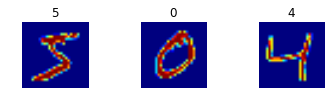

Some Test Data:


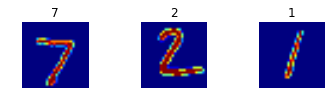

In [3]:
# display a few training images
print('Some Training Data:')
for i in range(3):
  plt.subplot(3, 3, i+1)  
  plt.axis('off')
  plt.imshow(x_train[i])
  plt.title(y_train[i])
plt.show()

# display a few test images
print('Some Test Data:')
for i in range(3):
  plt.subplot(3, 3, i+1)  
  plt.axis('off')
  plt.imshow(x_test[i]) 
  plt.title(y_test[i])
plt.show()

## 3. Preparing the Data

In [4]:
input_shape = img_rows * img_cols

# convert the 3-d arrays into matrices. 28x28 images are flattened into length 784 vectors.
x_train = x_train.reshape(60000, input_shape)
x_test = x_test.reshape(10000, input_shape)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# convert the grayscale values from integers ranging between 0 to 255 into floating point values ranging between 0 and 1.
x_train /= 255
x_test /= 255

In [5]:
# one-hot encode the y integer vectors into binary class matrices
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

## 4. Defining the Model

In [6]:
# creating a sequential model and then adding layers
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(input_shape,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

## 5. Displaying the Details of the Model

In [7]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


## 6. Compiling the Model

In [8]:
# compile the model with appropriate loss function, optimizer, and metrics
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=RMSprop(), metrics=['accuracy'])

## 7. Training the Model

In [9]:
# Use the fit() function to train the model with callback for TensorBoard
epochs = 15
tbCallBack = keras.callbacks.TensorBoard(log_dir='./logs')
history = model.fit(x_train, y_train, epochs=epochs, batch_size=128, validation_split = 0.2, callbacks=[tbCallBack])

Train on 48000 samples, validate on 12000 samples
Epoch 1/15
48000/48000 [==============================] - 11s - loss: 0.2733 - acc: 0.9151 - val_loss: 0.1219 - val_acc: 0.9623
Epoch 2/15
48000/48000 [==============================] - 10s - loss: 0.1126 - acc: 0.9658 - val_loss: 0.0954 - val_acc: 0.9712
Epoch 3/15
48000/48000 [==============================] - 11s - loss: 0.0792 - acc: 0.9752 - val_loss: 0.0877 - val_acc: 0.9768
Epoch 4/15
48000/48000 [==============================] - 10s - loss: 0.0638 - acc: 0.9803 - val_loss: 0.0911 - val_acc: 0.9772
Epoch 5/15
48000/48000 [==============================] - 12s - loss: 0.0514 - acc: 0.9839 - val_loss: 0.1005 - val_acc: 0.9756
Epoch 6/15
48000/48000 [==============================] - 11s - loss: 0.0446 - acc: 0.9864 - val_loss: 0.0933 - val_acc: 0.9765
Epoch 7/15
48000/48000 [==============================] - 13s - loss: 0.0374 - acc: 0.9887 - val_loss: 0.0976 - val_acc: 0.9785
Epoch 8/15
48000/48000 [==============================

## 8. Display the Training Detail

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


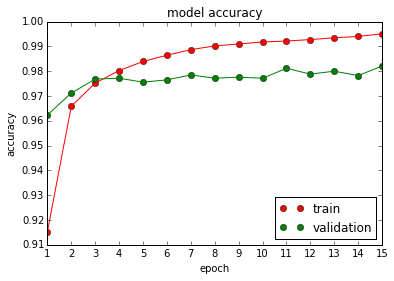

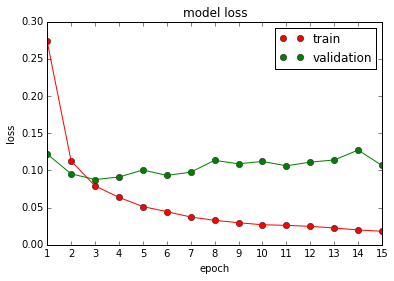

In [10]:
# display all data in history
print(history.history.keys())

# summarize history for accuracy
poly_deg = 5
plt.plot(history.history['acc'], "ro")
plt.plot(history.history['val_acc'], "go")
x = list(range(0, len(history.history['acc'])))
smooth = spline(x, history.history['acc'], x)
plt.plot(x, smooth, "r")
x = list(range(0, len(history.history['acc'])))
smooth = spline(x, history.history['val_acc'], x)
plt.plot(x, smooth, "g")
plt.xticks(x, range(1, epochs + 1))
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'], "ro")
plt.plot(history.history['val_loss'], "go")
x = list(range(0, len(history.history['loss'])))
smooth = spline(x, history.history['loss'], x)
plt.plot(x, smooth, "r")
x = list(range(0, len(history.history['val_loss'])))
smooth = spline(x, history.history['val_loss'], x)
plt.plot(x, smooth, "g")
plt.xticks(x, range(1, epochs + 1))
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

## 9 Evaluating the Model

In [11]:
# Evaluate the model's performance on the test data:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.100679091073
Test accuracy: 0.982


## 10 Generate Predictions with the Test Data

In [12]:
# Generate predictions on test data:
classes = model.predict_classes(x_test, batch_size=1)
print(classes)

 9964/10000 [============================>.] - ETA: 0s[7 2 1 ..., 4 5 6]
